In [613]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline


In [682]:
cereal = pd.read_csv('cereals.csv')

new_cereal = cereal.set_index('name')
mfr_type = new_cereal[['mfr', 'type']]

#Set my index to the column 'name' to make it easier to access certain rows. 

###Data Clean

basic_4 = new_cereal.ix[['Basic_4']]
basic_4_nums = basic_4[['calories', 'protein', 'fat', 'sodium','fiber',
         'carbo','sugars','potass','vitamins','shelf','weight','cups']]
new_basic_4 = basic_4_nums.apply(lambda x: x/ basic_4['weight'])


After doing things the hard way(6 times), I finally created a function that makes each cereal have a weight of 1. We needed to make sure the data was unified with the same weight size so the data would be represented correctly.

In [597]:
def function(new_cereal):
    category = new_cereal[['calories', 'protein', 'fat', 'sodium','fiber',
                           'carbo','sugars','potass','vitamins','shelf','weight','cups']]
    return category.apply(lambda x: x / new_cereal['weight'])

cereal_by_weight = function(new_cereal)

main_cereal = cereal_by_weight.merge(mfr_type, left_index=True, right_index=True)

##Merged the 'mfr' and 'type' columns back to the updated dataset.

Now, I split the data to figure out the best predictor for potassium. There are two -1's in th potass column.

In [598]:
train, test = train_test_split(main_cereal, test_size=.33)

In [599]:
train1 = train[['fiber','potass']]
train_input = train1[['fiber']]
train_output = train1[['potass']]

In [600]:
test1 = test[['fiber','potass']]
test_input = test1[['fiber']]
test_output = test1[['potass']]

In [684]:
regr = linear_model.LinearRegression()
regr.fit(train_input, train_output)
print('Coefficients: ',regr.coef_)
print(regr.score(test_input, test_output))

Coefficients:  [[ 28.23497711]]
0.723879102541


Fiber is the best predictor for potassium.

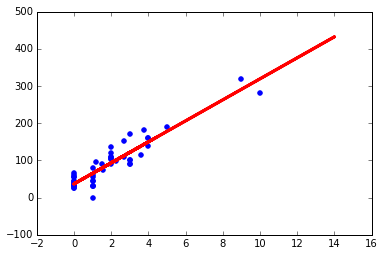

In [685]:
plt.scatter(train_input, train_output, color='blue')
plt.plot(test_input, regr.predict(test_input), color='red', linewidth=3)
plt.show()

In [603]:
potass_Al = regr.predict(1)[0]

main_cereal['potass'][main_cereal.potass == -1] = potass_Al
potass_Al
#potass_Cream = regr.predict(1)[0]
#potass_Cream


/Users/pnitto/iron_yard/honey-nut-clusters/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array([ 65.22686166])

Filling in Almond_Delights potass column.

The Almond_Delights and Cream_of_wheat(Quick) have an estimated potassium amount of 65.22 for a fiber count of 1. I set the -1 in the potass column for Almond_Delights and Cream_of_wheat(Quick) to approximately 65.22.

In [604]:
train2 = train[['shelf','sugars','calories','protein','cups','vitamins','potass','fat','fiber']]
train_input1 = train2[['shelf','calories','protein','cups','vitamins','potass','fat','fiber']]
train_output1 = train2[['sugars']]

test2 = test[['shelf','sugars','calories','protein','cups','vitamins','potass','fat','fiber']]
test_input1 = test2[['shelf','calories','protein','cups','vitamins','potass','fat','fiber']]
test_output1 = test2[['sugars']]

In [605]:
regr1 = linear_model.LinearRegression()
regr1.fit(train_input1, train_output1)
print('Coefficients: ',regr1.coef_)
print(regr1.score(test_input1, test_output1))

Coefficients:  [[-0.55547426  0.10561195 -1.86624929 -2.54310705  0.00714299  0.02748262
   0.10868757 -0.41524754]]
0.581083148946


I could not find a predictor that shows a strong correlation to predict sugar or carbs for Quaker Oatmeal. Therefore, I am going to drop the Quaker_Oatmeal row because it is missing both a sugar and carbs amount. 

In [ ]:
main_cereal = main_cereal[main_cereal.carbo != -1]


I dropped the Quaker_Oatmeal row because it contained two -1 values.

In [606]:

def get_series(mfr):
    values = np.unique(mfr)
    values2nums = dict(zip(values,range(len(values))))
    return mfr.replace(values2nums)
new_mfr = get_series(mfr)
df_mfr = new_mfr.to_frame()
main_cereal = df_mfr.merge(main_cereal, left_index=True, right_index=True)


This function converts the letters in the mfr column to integers.

In [ ]:
type1 = new_main_cereal.type1

def get_series(type1):
    values = np.unique(type1)
    value2nums = dict(zip(values,range(len(values))))
    return type1.replace(value2nums)
new_type = get_series(type1)
df_type = new_type.to_frame()
new_main_cereal = df_type.merge(new_main_cereal, left_index=True, right_index=True)

This function converts the letters in the type column to integers. Then, I merge the new data set back to the original.

I needed to drop the previous mfr and type columns, and I also renamed the new columns. 

In [ ]:
main_cereal.rename(columns= {'type': 'type1'}, inplace=True)
new_main_cereal = main_cereal.drop(['mfr_y'], axis=1)
new_main_cereal.rename(columns={'mfr_x':'mfr'}, inplace=True)
cereal_nums = new_main_cereal.drop(['type1_y'], axis=1)
nums_cereal = cereal_nums.rename(columns={'type1_x':'type_int'})


I believe doing preprocessing.scale normalizes the data. 

In [611]:

nums_cereal_scaled = preprocessing.scale(nums_cereal)

In [612]:
nums_cereal_scaled

array([[-0.16439899,  0.17705408, -2.45948213, ...,  0.80629613,
         0.        , -1.57732763],
       [-0.16439899,  1.34715063,  1.15214517, ...,  0.80629613,
         0.        ,  0.54521874],
       [-0.16439899, -0.40799419, -2.45948213, ...,  0.80629613,
         0.        , -1.57732763],
       ..., 
       [-0.16439899,  1.9321989 , -0.29250575, ..., -1.23084854,
         0.        , -0.50021455],
       [-0.16439899, -0.99304246, -0.29250575, ..., -1.23084854,
         0.        ,  0.54521874],
       [-0.16439899, -0.99304246,  0.42981971, ..., -1.23084854,
         0.        , -0.24677617]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(nums_cereal_scaled)
reduced_cereal = pca.transform(nums_cereal_scaled)


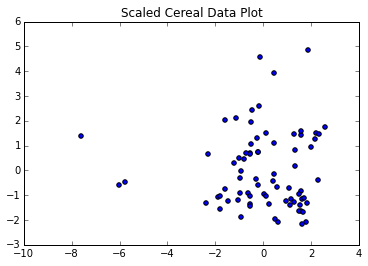

In [622]:
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:,1])
plt.title("Scaled Cereal Data Plot")
plt.show()

I can see roughly six different clusters.

I will first look at 3 clusters.

In [618]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_cereal)

In [619]:
y_pred

array([2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0], dtype=int32)

In [620]:
list(zip(reduced_cereal, y_pred))[:10]

[(array([-6.01441343, -0.57480438]), 2),
 (array([-0.91495783, -1.88413618]), 0),
 (array([-5.78849025, -0.45663998]), 2),
 (array([-7.62865497,  1.4066216 ]), 2),
 (array([ 0.59593805, -0.67278571]), 0),
 (array([ 0.49778462, -1.96714166]), 0),
 (array([ 1.1857631 , -1.15712659]), 0),
 (array([-0.2306841 , -0.59177814]), 0),
 (array([-0.91467557, -0.02321046]), 0),
 (array([-2.30602062,  0.65133166]), 1)]

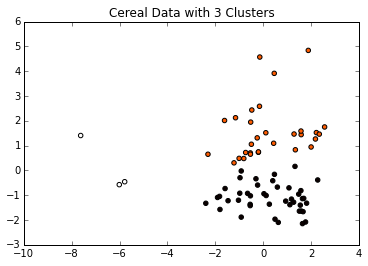

In [621]:
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal Data with 3 Clusters")
plt.show()

This analysis is for 4 clusters of the cereal data set.

In [623]:
kmeans1 = KMeans(4)
y_pred1 = kmeans1.fit_predict(reduced_cereal)

In [625]:
list(zip(reduced_cereal, y_pred1))[:10]

[(array([-6.01441343, -0.57480438]), 2),
 (array([-0.91495783, -1.88413618]), 0),
 (array([-5.78849025, -0.45663998]), 2),
 (array([-7.62865497,  1.4066216 ]), 2),
 (array([ 0.59593805, -0.67278571]), 1),
 (array([ 0.49778462, -1.96714166]), 1),
 (array([ 1.1857631 , -1.15712659]), 1),
 (array([-0.2306841 , -0.59177814]), 0),
 (array([-0.91467557, -0.02321046]), 0),
 (array([-2.30602062,  0.65133166]), 0)]

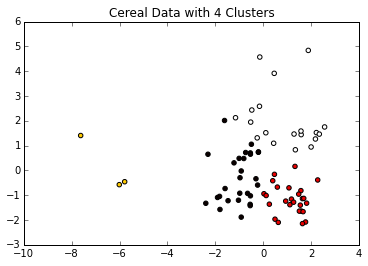

In [626]:
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1], c=y_pred1, cmap="hot")
plt.title("Cereal Data with 4 Clusters")
plt.show()

In [627]:
kmeans2 = KMeans(5)
y_pred2 = kmeans2.fit_predict(reduced_cereal)

In [628]:
list(zip(reduced_cereal, y_pred2))[:10]

[(array([-6.01441343, -0.57480438]), 2),
 (array([-0.91495783, -1.88413618]), 1),
 (array([-5.78849025, -0.45663998]), 2),
 (array([-7.62865497,  1.4066216 ]), 2),
 (array([ 0.59593805, -0.67278571]), 3),
 (array([ 0.49778462, -1.96714166]), 3),
 (array([ 1.1857631 , -1.15712659]), 3),
 (array([-0.2306841 , -0.59177814]), 1),
 (array([-0.91467557, -0.02321046]), 1),
 (array([-2.30602062,  0.65133166]), 4)]

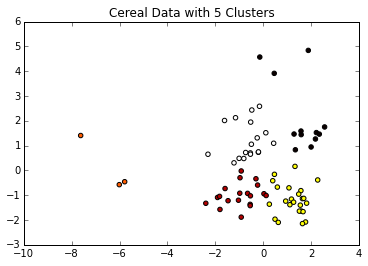

In [629]:
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1], c=y_pred2, cmap="hot")
plt.title("Cereal Data with 5 Clusters")
plt.show()

In [679]:
kmeans3 = KMeans(7)
y_pred3 = kmeans3.fit_predict(reduced_cereal)

In [680]:
list(zip(reduced_cereal, y_pred3))[:10]

[(array([-6.01441343, -0.57480438]), 5),
 (array([-0.91495783, -1.88413618]), 6),
 (array([-5.78849025, -0.45663998]), 5),
 (array([-7.62865497,  1.4066216 ]), 5),
 (array([ 0.59593805, -0.67278571]), 1),
 (array([ 0.49778462, -1.96714166]), 2),
 (array([ 1.1857631 , -1.15712659]), 2),
 (array([-0.2306841 , -0.59177814]), 1),
 (array([-0.91467557, -0.02321046]), 1),
 (array([-2.30602062,  0.65133166]), 0)]

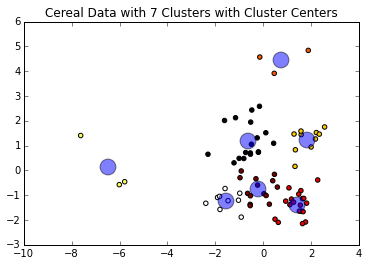

In [681]:
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1], c=y_pred3, cmap="hot")
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], alpha=.5, s=250)
plt.title("Cereal Data with 7 Clusters with Cluster Centers")
plt.show()

I think 7 clusters is an accurate way to group this data.

In [690]:
print(kmeans3.cluster_centers_)


[[-0.64509376  1.19774594]
 [-0.1983638  -0.7536358 ]
 [ 1.42191719 -1.37613438]
 [ 0.73823771  4.44115807]
 [ 1.84949803  1.24378174]
 [-6.47718622  0.12505908]
 [-1.54508673 -1.22204906]]


In [691]:
classified_data = kmeans3.labels_
processed_data = nums_cereal.copy()

In [704]:
processed_data['Cluster_Class'] = pd.Series(classified_data, index=processed_data.index)

This makes a new column identifying the cereal name to a cluster class. Then, I sorted the data by cluster class to get a better understanding of which cereals belong to what class. 

In [711]:
processed_data.sort_index(ascending=True, by =['Cluster_Class'])


,type_int,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,Cluster_Class
name,,,,,,,,,,,,,,,
Cheerios,0,1,110.000000,6.000000,2.000000,290.000000,2.000000,17.000000,1.000000,105.000000,25.000000,1.000000,1,1.250000,0
Frosted_Mini-Wheats,0,2,100.000000,3.000000,0.000000,0.000000,3.000000,14.000000,7.000000,100.000000,25.000000,2.000000,1,0.800000,0
Nutri-grain_Wheat,0,2,90.000000,3.000000,0.000000,170.000000,3.000000,18.000000,2.000000,90.000000,25.000000,3.000000,1,1.000000,0
Wheaties,0,1,100.000000,3.000000,1.000000,200.000000,3.000000,17.000000,3.000000,110.000000,25.000000,1.000000,1,1.000000,0
Quaker_Oat_Squares,0,5,100.000000,4.000000,1.000000,135.000000,2.000000,14.000000,6.000000,110.000000,25.000000,3.000000,1,0.500000,0
Raisin_Squares,0,2,90.000000,2.000000,0.000000,0.000000,2.000000,15.000000,6.000000,110.000000,25.000000,3.000000,1,0.500000,0
Shredded_Wheat,0,3,96.385542,2.409639,0.000000,0.000000,3.614458,19.277108,0.000000,114.457831,0.000000,1.204819,1,1.204819,0
Shredded_Wheat_'n'Bran,0,3,90.000000,3.000000,0.000000,0.000000,4.000000,19.000000,0.000000,140.000000,0.000000,1.000000,1,0.670000,0
Shredded_Wheat_spoon_size,0,3,90.000000,3.000000,0.000000,0.000000,3.000000,20.000000,0.000000,120.000000,0.000000,1.000000,1,0.670000,0


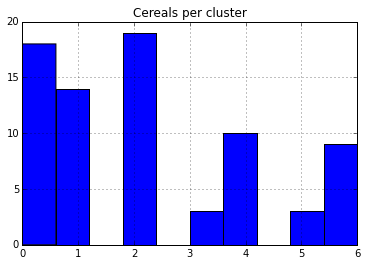

In [722]:
processed_data[['Cluster_Class']].hist()
plt.title("Cereals per cluster")
#Shows how many cereals are in each cluster

Most of the cereals belong in the 2 cluster group.

In [713]:
cluster0 = processed_data[processed_data.Cluster_Class == 0]
cluster1 = processed_data[processed_data.Cluster_Class == 1]
cluster2 = processed_data[processed_data.Cluster_Class == 2]
cluster3 = processed_data[processed_data.Cluster_Class == 3]
cluster4 = processed_data[processed_data.Cluster_Class == 4]
cluster5 = processed_data[processed_data.Cluster_Class == 5]
cluster6 = processed_data[processed_data.Cluster_Class == 6]

cluster0_mean = cluster0.mean()
cluster1_mean = cluster1.mean()
cluster2_mean = cluster2.mean()
cluster3_mean = cluster3.mean()
cluster4_mean = cluster4.mean()
cluster5_mean = cluster5.mean()
cluster6_mean = cluster6.mean()

These 6 bar graphs will show the mean amounts for each column name per cluster. We are able to see the differences in clusters by looking at these graphs. In general, distinguishing features are the calorie amount, sodium content, carb amount, sugar amount, potassium amount, and vitamin amount. 

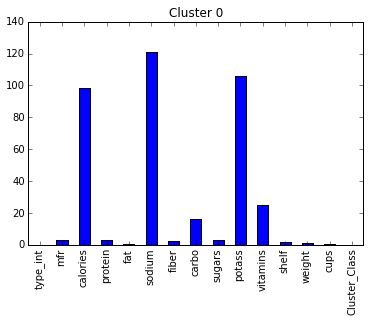

In [715]:
cluster0_mean.plot(kind='bar')
plt.title("Cluster 0")

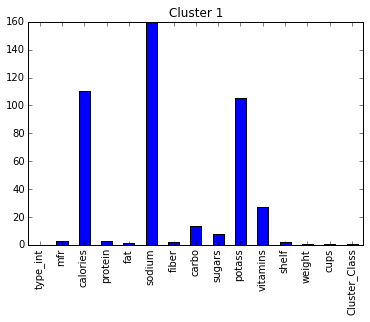

In [716]:
cluster1_mean.plot(kind='bar')
plt.title("Cluster 1")

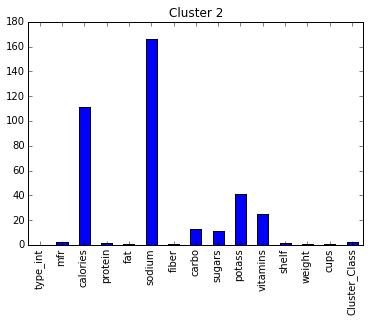

In [717]:
cluster2_mean.plot(kind='bar')
plt.title("Cluster 2")

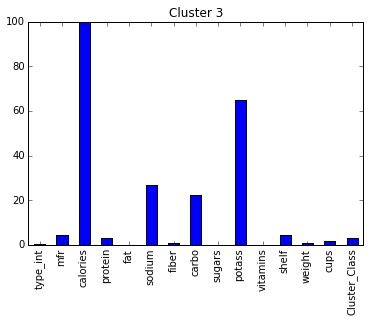

In [718]:
cluster3_mean.plot(kind='bar')
plt.title("Cluster 3")

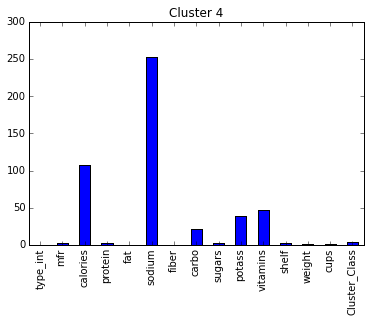

In [719]:
cluster4_mean.plot(kind='bar')
plt.title("Cluster 4")

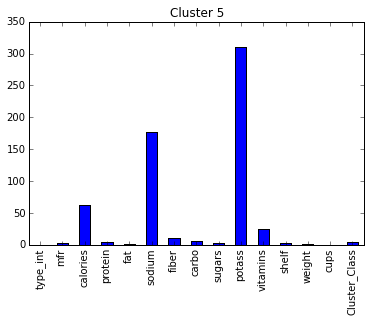

In [720]:
cluster5_mean.plot(kind='bar')
plt.title("Cluster 5")

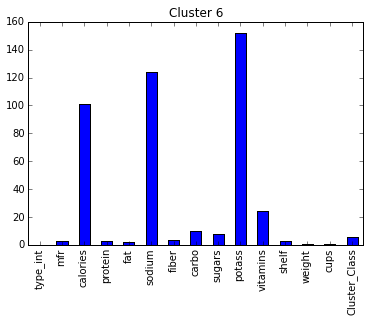

In [721]:
cluster6_mean.plot(kind='bar')
plt.title("Cluster 6")